# [**Stock Prediction using LSTM Networks for Google Company**](https://)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
data=pd.read_csv("Google_train_data.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [ ]:
X_train=[]
y_train=[]

for i in range (60,1149):
  X_train.append(trainData[i-60:i,0])
  y_train.append(trainData[i,0])
  
X_train,y_train=np.array(X_train),np.array(y_train)

In [ ]:
model=Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
hist=model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
35/35 - 10s - loss: 0.0269 - 10s/epoch - 293ms/step
Epoch 2/20
35/35 - 3s - loss: 0.0078 - 3s/epoch - 92ms/step
Epoch 3/20
35/35 - 3s - loss: 0.0075 - 3s/epoch - 91ms/step
Epoch 4/20
35/35 - 3s - loss: 0.0065 - 3s/epoch - 90ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0064 - 4s/epoch - 107ms/step
Epoch 6/20
35/35 - 3s - loss: 0.0073 - 3s/epoch - 88ms/step
Epoch 7/20
35/35 - 3s - loss: 0.0060 - 3s/epoch - 87ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0057 - 4s/epoch - 108ms/step
Epoch 9/20
35/35 - 3s - loss: 0.0065 - 3s/epoch - 88ms/step
Epoch 10/20
35/35 - 3s - loss: 0.0047 - 3s/epoch - 88ms/step
Epoch 11/20
35/35 - 3s - loss: 0.0050 - 3s/epoch - 89ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0052 - 4s/epoch - 108ms/step
Epoch 13/20
35/35 - 3s - loss: 0.0049 - 3s/epoch - 89ms/step
Epoch 14/20
35/35 - 3s - loss: 0.0045 - 3s/epoch - 90ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0042 - 4s/epoch - 100ms/step
Epoch 16/20
35/35 - 3s - loss: 0.0040 - 3s/epoch - 96ms/step
Epoch 17/20
35/35 - 3s - l

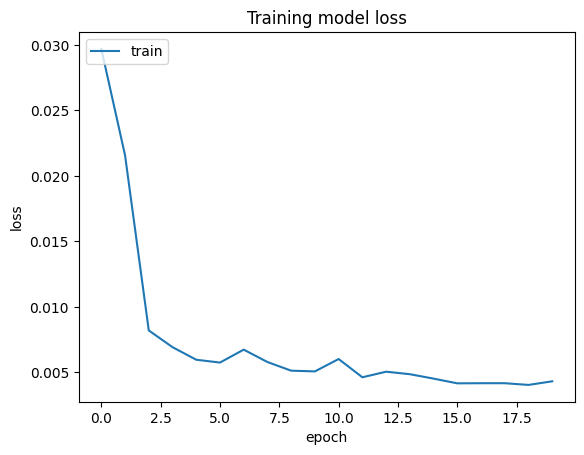

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData=pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close, errors='coerce')
testData=testData.dropna()
testData=testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
  X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 0s 69ms/step


array([[1.1136216],
       [1.1147056],
       [1.1273326],
       [1.144494 ],
       [1.1565534],
       [1.1541317],
       [1.1405059],
       [1.1242101],
       [1.1157229],
       [1.1142176],
       [1.1056966],
       [1.0932398],
       [1.0836514],
       [1.0746657],
       [1.073964 ],
       [1.0788769],
       [1.0981001],
       [1.1260412],
       [1.1566422],
       [1.1869154],
       [1.1959138],
       [1.1917669],
       [1.1714944],
       [1.1442747],
       [1.1211156],
       [1.1087785],
       [1.1056995],
       [1.1032575],
       [1.0930891],
       [1.0815277],
       [1.0702318],
       [1.057502 ],
       [1.0373999],
       [1.0136712],
       [1.0085486],
       [1.02148  ],
       [1.0430458],
       [1.0654068],
       [1.0866961],
       [1.0957716],
       [1.1090328],
       [1.1250536],
       [1.1426404],
       [1.1578176],
       [1.1670936],
       [1.1666137],
       [1.1555051],
       [1.1480017],
       [1.1469256],
       [1.1530722],


In [ ]:
predicted_price = sc.inverse_transform(y_pred)

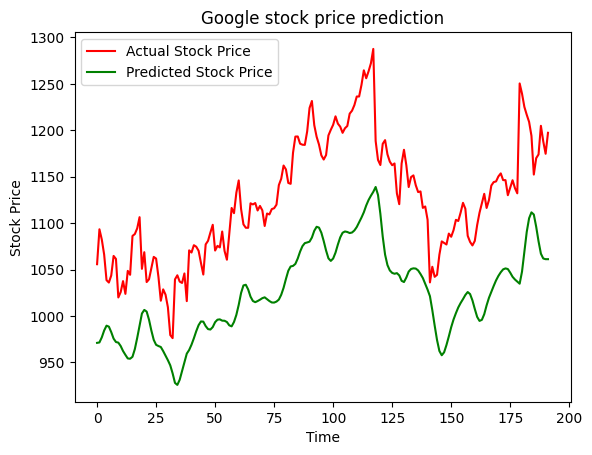

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()